In [1]:
import os
import numpy as np

import yaml
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import seaborn as sns

from OrderParameter import *

# Download link
def download_link(doi, file):
    if "zenodo" in doi.lower():
        zenodo_entry_number = doi.split(".")[2]
        return 'https://zenodo.org/record/' + zenodo_entry_number + '/files/' + file
    else:
        print ("DOI provided: {0}".format(doi))
        print ("Repository not validated. Please upload the data for example to zenodo.org")
        return ""
    
# read mapping file
def read_mapping_file(mapping_file, atom1):
    with open(mapping_file, 'rt') as mapping_file:
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
    return m_atom1

def read_mapping_filePAIR(mapping_file, atom1, atom2):
    with open(mapping_file, 'rt') as mapping_file:
            print(mapping_file)
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
#                    print(m_atom1)
                if atom2 in line: 
                    m_atom2 = line.split()[1]
#                    print(m_atom2)
    return m_atom1, m_atom2

def make_positive_angles(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = np.degrees(x[i]) + 360
        else:
            x[i] = np.degrees(x[i])
    return x

def make_positive_anglesDEG(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = x[i] + 360
        else:
            x[i] = x[i]
    return x

In [2]:
# angles of lipidA as a function of lipidB fraction
def plotHGangles(dois, lipidA, lipidB):
    for subdir, dirs, files in os.walk(r'../Data/HGorientation/'):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith("README.yaml"):
                READMEfilepath = subdir + '/README.yaml'
                with open(READMEfilepath) as yaml_file:
                    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                    #Nlipids = [readme.get('N' + lipids[0])[0],readme.get('N' + lipids[1])[0],readme.get('N' + lipids[2])[0],readme.get('N' + lipids[3])[0]]
                    for doi in dois:
                        if(doi in readme.get('DOI')):
                            print(subdir)
                            PNfilepath = subdir + '/' + lipidA + 'PNvectorAVERAGE.dat'
                            PNangle = !cat {PNfilepath}
                            NlipidB = readme.get('N' + lipidB)[0]
                            NlipidA = readme.get('N' + lipidA)[0]
                            lipidBratio = NlipidB / (NlipidB + NlipidA)
                            outfilename = '../Data/PNangle' + lipidA + 'vs' + lipidB + readme.get('FF') + readme.get('TEMPERATURE') +'.dat'
                            outfile1=open(outfilename,'a')
                            outfile1.write(str(lipidBratio) + '  ' + str(PNangle[0]) + '\n')
                            outfile1.close()

In [3]:
# angles of lipidA as a function of ion concetration
def plotHGanglesIONS(dois, lipidA, lipidB, ion):
    for subdir, dirs, files in os.walk(r'../Data/HGorientation/'):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith("README.yaml"):
                READMEfilepath = subdir + '/README.yaml'
                with open(READMEfilepath) as yaml_file:
                    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                    #Nlipids = [readme.get('N' + lipids[0])[0],readme.get('N' + lipids[1])[0],readme.get('N' + lipids[2])[0],readme.get('N' + lipids[3])[0]]
                    for doi in dois:
                        if(doi in readme.get('DOI')):
                            print(subdir)
                            PNfilepath = subdir + '/' + lipidA + 'PNvectorAVERAGE.dat'
                            PNangle = !cat {PNfilepath}
                            NlipidB = readme.get('N' + lipidB)[0]
                            #CaConcentration = 0
                            try:
                                CaConcentration = readme.get('N' + ion) * 55.5 / readme.get('NSOL')
                            except:
                                print('Somenthing wrong with molecule numbers in' + subdir)
                            NlipidA = readme.get('N' + lipidA)[0]
                            lipidBratio = NlipidB / (NlipidB + NlipidA)
                            outfilename = '../Data/PNangle' + lipidA + str(lipidBratio) + lipidB + 'vs' + ion + readme.get('FF') + readme.get('TEMPERATURE') +'.dat'
                            outfile1=open(outfilename,'a')
                            outfile1.write(str(CaConcentration) + '  ' + str(PNangle[0]) + '\n')
                            outfile1.close()
                            !sort {outfilename} -o {outfilename}

In [4]:
# dihedrals of lipidA as a function of lipidB fraction
def plotDIHEDRALS(dois, lipidA, lipidB, dihedral):
    plt.figure()
    for subdir, dirs, files in os.walk(r'../Data/dihedral/'):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith("README.yaml"):
                READMEfilepath = subdir + '/README.yaml'
                with open(READMEfilepath) as yaml_file:
                    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                    #Nlipids = [readme.get('N' + lipids[0])[0],readme.get('N' + lipids[1])[0],readme.get('N' + lipids[2])[0],readme.get('N' + lipids[3])[0]]
                    for doi in dois:
                        if(doi in readme.get('DOI')):
                            print(subdir)
                            DIHEDRALfilepath = subdir + '/' + lipidA + '_' + dihedral[0] + '_' + dihedral[1] + '_' + dihedral[2] + '_' + dihedral[3] +'.xvg'
                            NlipidB = readme.get('N' + lipidB)[0]
                            NlipidA = readme.get('N' + lipidA)[0]
                            lipidBratio = NlipidB / (NlipidB + NlipidA)
                            #print(DIHEDRALfilepath)
                            #x, y = np.loadtxt(DIHEDRALfilepath, unpack=True)
                            data = np.loadtxt(DIHEDRALfilepath, unpack=True)
                            data[0] = make_positive_anglesDEG(data[0])
                            #data = sorted(data)
                            #data = sorted(data, key = [0])
                            #print(data)
                            #print(make_positive_anglesDEG(x))
                            #plt.plot(make_positive_anglesDEG(x),y)
                            plt.plot(data[0],data[1])


../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766
../Data/dihedral/702/d04/702d047ee14fb2c6b8ceb1666df45f0783272d8c/50161179ab704faeaf1644957545a77fe97a1063
../Data/dihedral/b86/c00/b86c00db1e4696dc7fa04770509c1cea31d4bf63/3c4f254f6ac8cba7eb9b53b430acba33ec2f5ce7
../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a244164604a0b91d9d877/25731b859c4bc2652de35ead4f799ac1d922df28
../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766
../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766
../Data/dihedral/702/d04/702d047ee14fb2c6b8ceb1666df45f0783272d8c/50161179ab704faeaf1644957545a77fe97a1063
../Data/dihedral/b86/c00/b86c00db1e4696dc7fa04770509c1cea31d4bf63/3c4f254f6ac8cba7eb9b53b430acba33ec2f5ce7
../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a244164604a0b91d9d877/25731b859c4bc2652de35ead4f799ac1d922df28
../Data/dihedral/66f/81c/66f81c7905a7

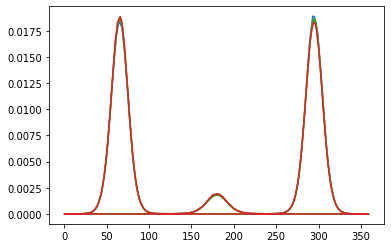

<Figure size 432x288 with 0 Axes>

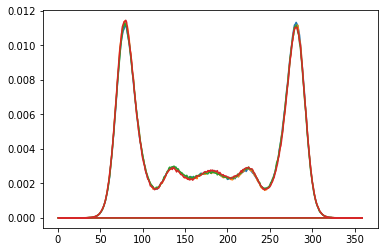

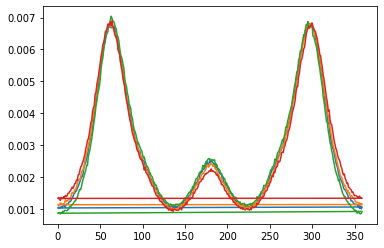

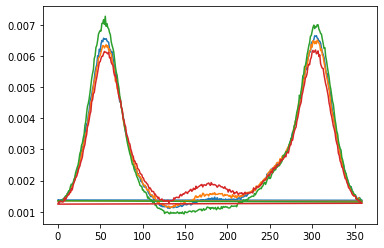

<Figure size 432x288 with 0 Axes>

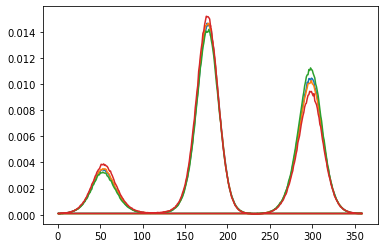

In [21]:
#dois = ['10.5281/zenodo.3997116', '10.5281/zenodo.4005515' , '10.5281/zenodo.3997135']  # CHARMM with CaCl
#dois = ['10.5281/zenodo.3613573'] #Slipids with CaCl 
#dois = ['10.5281/zenodo.3859339' , '10.5281/zenodo.3855729', '10.5281/zenodo.3862036']  # ECClipids with CaCl
#dois = ['10.5281/zenodo.4040423','10.5281/zenodo.1288297']
#dois = ['10.5281/zenodo.4040423']
dois = ['10.5281/zenodo.1288297']
dihedrals = [['M_G3O3_M', 'M_G3C4_M', 'M_G3C5_M', 'M_G3N6_M'],
           ['M_G3O3_M','M_G3C4_M','M_G3C5_M','M_G3C6_M'],
           ['M_G3P2_M', 'M_G3O3_M', 'M_G3C4_M', 'M_G3C5_M'],
           ['M_G3O1_M', 'M_G3P2_M', 'M_G3O3_M', 'M_G3C4_M'],
           ['M_G3_M', 'M_G3O1_M', 'M_G3P2_M', 'M_G3O3_M'],
           ['M_G2_M', 'M_G3_M', 'M_G3O1_M', 'M_G3P3_M'],
           ['M_G1_M', 'M_G2_M', 'M_G3_M', 'M_G3O1_M']
           ]

#['M_G3O3_M', 'M_G3C4_M', 'M_G3C5_M', 'M_G3N6_M'],

#           ['M_G2_M', 'M_G3_M', 'M_G3O1_M', 'M_G3P3_M'],

#['M_G3O3_M','M_G3C4_M','M_G3C5_M','M_G3C6_M'],

for dih in dihedrals:
    try:
        plotDIHEDRALS(dois, 'POPC', 'POPG',dih)
    except:
        continue

In [11]:
# Lipid17 PC:PG mixtures at 310K
dois= ['10.5281/zenodo.3237657' , '10.5281/zenodo.3241243']
plotHGangles(dois, 'POPC', 'POPG')


dois= ['10.5281/zenodo.3241243', '10.5281/zenodo.3832219']
plotHGangles(dois, 'POPG', 'POPC')


../Data/HGorientation/299/9ba/2999ba7a8e75cdcbd0493b035d620556aa9a57c5/a92f8b57bb117b56d3bb16edc0d69662e0517d31
../Data/HGorientation/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9
../Data/HGorientation/96f/656/96f65688e4d3d870516abbb3dba34436df44cd52/53cf119244fbdad6b04b8c9cd2d33090afeba06a
../Data/HGorientation/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9


In [167]:
# CHARMM with CaCl
dois = ['10.5281/zenodo.3997116', '10.5281/zenodo.4005515' , '10.5281/zenodo.3997135']  
plotHGanglesIONS(dois, 'POPG', 'POPC', 'CAL')


../Data/HGorientation/0c2/1a9/0c21a9be136ea0eb9df9e5c6cdc19f723a0af245/9ac73b6a98acb54a7a67a5d690794ad7f1e4a1d1
../Data/HGorientation/207/4f9/2074f96d71ae32a42267bd5407a30ca9b26aca3e/e439d10af0c5ea60c8569780e32b416ea05f24b5
../Data/HGorientation/479/374/47937487ddd47f9f363eed8d048e153dec3b87bd/4404adfe3d70ba3582c6bfa0656563f8eaad7887


In [14]:
# Lipid17ecc with CaCl
dois= ['10.5281/zenodo.3859339' , '10.5281/zenodo.3855729', '10.5281/zenodo.3862036']

plotHGanglesIONS(dois, 'POPC', 'POPG', 'CAL')
plotHGanglesIONS(dois, 'POPG', 'POPC', 'CAL')



../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/4062f0e472c77353fc638996ae7dfcb505f3433e
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/b0986c1ba7f7ade23f9c06f1aded51fd3a8c6304
../Data/HGorientation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
../Data/HGorientation/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/4062f0e472c77353fc638996ae7dfcb505f3433e
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/b0986c1ba7f7ade23f9c06f1aded51fd3a8c6304
../Data/HGorientation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
../Data/HGorientation/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea


In [13]:
# Lipid17 POPC:POPG 1:1 with CaCl
dois= ['10.5281/zenodo.3859339' , '10.5281/zenodo.3855729', '10.5281/zenodo.3862036']

plotHGanglesIONS(dois, 'POPC', 'POPG', 'CAL')
plotHGanglesIONS(dois, 'POPG', 'POPC', 'CAL')



../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/4062f0e472c77353fc638996ae7dfcb505f3433e
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/b0986c1ba7f7ade23f9c06f1aded51fd3a8c6304
../Data/HGorientation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
../Data/HGorientation/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/4062f0e472c77353fc638996ae7dfcb505f3433e
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/b0986c1ba7f7ade23f9c06f1aded51fd3a8c6304
../Data/HGorientation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
../Data/HGorientation/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea
